## Bollinger Bands: Simple Case Study of SAUDI ARAMCO stocks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [3]:
today=datetime.today().strftime("%Y-%m-%d")
data=yf.download("2222.SR", start="2020-01-01", end=today)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,32.045452,32.045452,31.863636,31.909090,29.314684,7743038
2020-01-02,31.909090,32.045452,31.863636,31.954544,29.356443,10391585
2020-01-05,31.818180,31.818180,31.363636,31.409090,28.855337,22944659
2020-01-06,31.363636,31.409090,30.954544,31.363636,28.813580,21274396
2020-01-07,31.318180,31.409090,31.045454,31.227272,28.688299,12657341
...,...,...,...,...,...,...
2021-11-14,37.500000,37.549999,37.400002,37.450001,37.450001,1634954
2021-11-15,37.349998,37.450001,37.250000,37.250000,37.250000,2559828
2021-11-16,37.200001,37.299999,37.000000,37.150002,37.150002,3672811


No handles with labels found to put in legend.


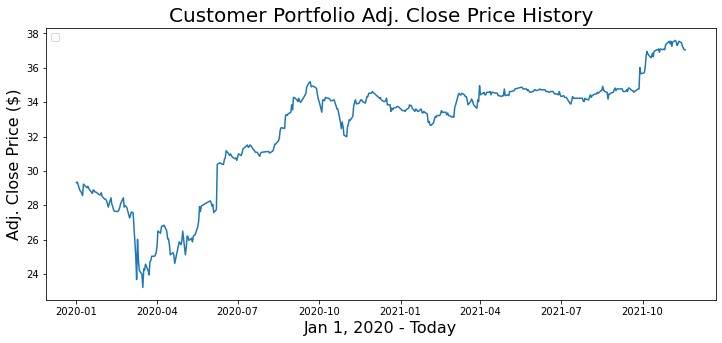

In [10]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data["Adj Close"])
plt.title("Customer Portfolio Adj. Close Price History", fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Jan 1, 2020 - Today", fontsize=16)
plt.ylabel("Adj. Close Price ($)",fontsize=16)

plt.show()

In [5]:
def SMA(data, window, column):
    return data[column].rolling(window=window).mean()
data["SMA_30"]=SMA(data,window=30, column="Adj Close")

In [6]:
period_short=30
def bb(data, sma, window):
    std = data.rolling(window = period_short).std()
    upper_bb=sma+std*2
    lower_bb = sma-std*2
    return upper_bb, lower_bb

data['upper_bb'], data['lower_bb'] = bb(data["Adj Close"], data['SMA_30'], 30)

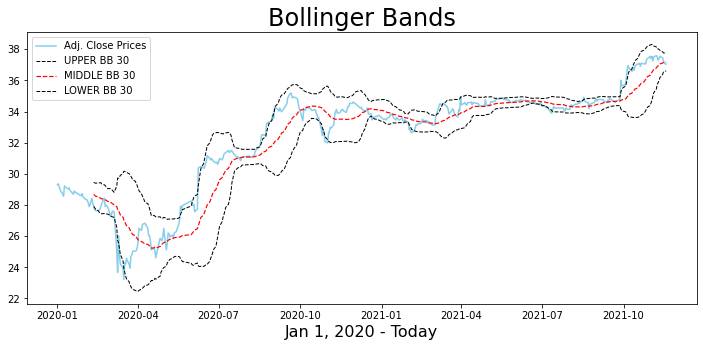

In [14]:
plt.figure(figsize=(12,5))
plt.plot(data["Adj Close"],label = 'Adj. Close Prices', color = 'skyblue')
plt.plot(data["upper_bb"],label = 'UPPER BB 30', linestyle = '--', linewidth = 1, color = 'black')
plt.plot(data["SMA_30"],label = 'MIDDLE BB 30', linestyle = '--', linewidth = 1.2, color = 'red')
plt.plot(data["lower_bb"],label = 'LOWER BB 30', linestyle = '--', linewidth = 1, color = 'black')
plt.xlabel("Jan 1, 2020 - Today", fontsize=16)
plt.legend(loc = 'upper left')
plt.title('Bollinger Bands', fontsize=24)
plt.show()

In [8]:
def BB_trade(data, lower_bb, upper_bb):
    buy_signal_price = []
    sell_signal_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_signal_price.append(data[i])
                sell_signal_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_signal_price.append(np.nan)
            sell_signal_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_signal_price, sell_signal_price, bb_signal

buy_signal_price, sell_signal_price, bb_signal = BB_trade(data['Close'], data['lower_bb'], data['upper_bb'])

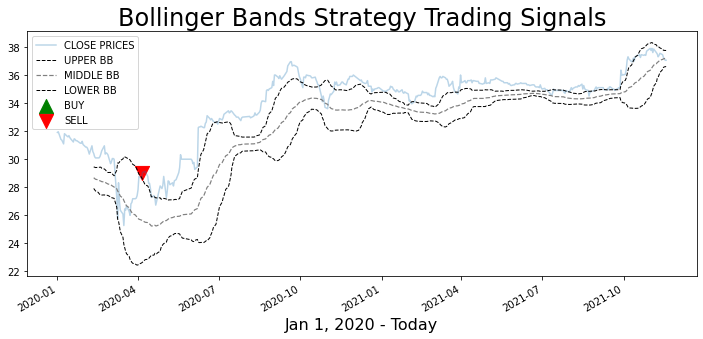

In [13]:
plt.figure(figsize=(12,5))
data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
data["SMA_30"].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(data.index, buy_signal_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, sell_signal_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('Bollinger Bands Strategy Trading Signals', fontsize=24)
plt.xlabel("Jan 1, 2020 - Today", fontsize=16)
plt.legend(loc = 'upper left')
plt.show()